## Data and Library load

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import patches
# numpy 출력 형식 지정
np.set_printoptions(precision=4, linewidth=150)
import matplotlib as mpl

from mpl_toolkits import mplot3d
import matplotlib.font_manager as mfm


# matplotlib 스타일 지정
mpl.style.use('bmh')
mpl.style.use('seaborn-whitegrid')
style = plt.style.library['bmh']
# 스타일 컬러를 쉽게 쓸 수 있도록 리스트 저장
style_colors = [ c['color'] for c in style['axes.prop_cycle'] ]

# 그림을 컬러로 출력하고 싶으면 True로 수정
g_color = False

# 그림을 로컬 폴더에 저장하고 싶으면 True로 수정 
file_print = False

In [2]:
!git clone -l -s https://github.com/metamath1/noviceml.git noviceml


fatal: destination path 'noviceml' already exists and is not an empty directory.


In [3]:
# 구글 colab 환경일 경우 그래프에 한글 폰트 사용을 위한 설정
path = 'noviceml/font/NanumBarunGothic.ttf'
fontprop = mfm.FontProperties(fname=path, size=18)

In [4]:
sns.set_theme(style='whitegrid')
sns.set_palette('twilight')

In [5]:
train = pd.read_csv('/content/eng_train.csv')
test = pd.read_csv('/content/eng_test.csv')
submission = pd.read_csv('/content/eng_sample.csv')

In [6]:
print(train.shape)
print(test.shape)
print(submission.shape)

(31684, 7)
(7920, 6)
(7920, 2)


## Data check

### Columns

- index

- Send: 송부 상세 지역

- Rec: 수신 상세 지역

- item : 물픔_카테고리

- counts: 운송 수

- Send_grid: 송부 지역( 국내 시도군 )

- Rec_grid: 수신 지역(국내 시도군)

### Train

In [7]:
train.head()

,index,Send,Rec,item,counts,Send_grid,Rec_grid
0,0,5011000595017300,2871000192069300,음반,3,50110,28710
1,1,4148000690043300,5011000264024400,문화컨텐츠,3,41480,50110
2,2,5011000078068400,1120000007005400,농산물,3,50110,11200
3,3,4127100048006400,5011000587019400,기타식품,7,41271,50110
4,4,5011000078068400,2823700010076300,농산물,3,50110,28237


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31684 entries, 0 to 31683
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      31684 non-null  int64 
 1   Send       31684 non-null  int64 
 2   Rec        31684 non-null  int64 
 3   item       31684 non-null  object
 4   counts     31684 non-null  int64 
 5   Send_grid  31684 non-null  int64 
 6   Rec_grid   31684 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 1.7+ MB


### Test

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      7920 non-null   int64 
 1   Send       7920 non-null   int64 
 2   Rec        7920 non-null   int64 
 3   item       7920 non-null   object
 4   Send_grid  7920 non-null   int64 
 5   Rec_grid   7920 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 371.4+ KB


In [10]:
test.head()

,index,Send,Rec,item,Send_grid,Rec_grid
0,0,4167000577042200,5011000435014100,선케어,41670,50110
1,1,1156000009012200,5011000172034400,구강위생용품,11560,50110
2,2,4122000363057300,5011000361097300,캠핑,41220,50110
3,3,5011000436041400,2826000084036400,아웃도어가구,50110,28260
4,4,4150000241065200,5011000169044300,분유/이유식/아기간식,41500,50110


In [11]:
submission.head()

,index,counts
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


## EDA

### Send_grid

In [12]:
train.groupby('Send_grid').count()['counts'].sort_values()

Send_grid
47920        1
31170        1
31200        1
42210        1
42190        1
         ...  
41590      394
41410      472
41480     1199
50130    10431
50110    13030
Name: counts, Length: 237, dtype: int64

In [13]:
train.groupby('Send_grid').count()['counts'].sort_values().unique()

array([    1,     2,     3,     4,     5,     6,     7,     8,     9,    10,    11,    12,    13,    14,    15,    16,    17,    18,    19,    20,
          21,    22,    23,    24,    25,    26,    27,    28,    29,    30,    31,    32,    35,    36,    37,    39,    40,    41,    43,    44,
          47,    48,    50,    58,    59,    60,    62,    64,    74,    91,    94,    97,   102,   103,   113,   114,   116,   123,   149,   175,
         182,   194,   250,   283,   310,   341,   394,   472,  1199, 10431, 13030])

Text(0, 0.5, 'Number of Orders')

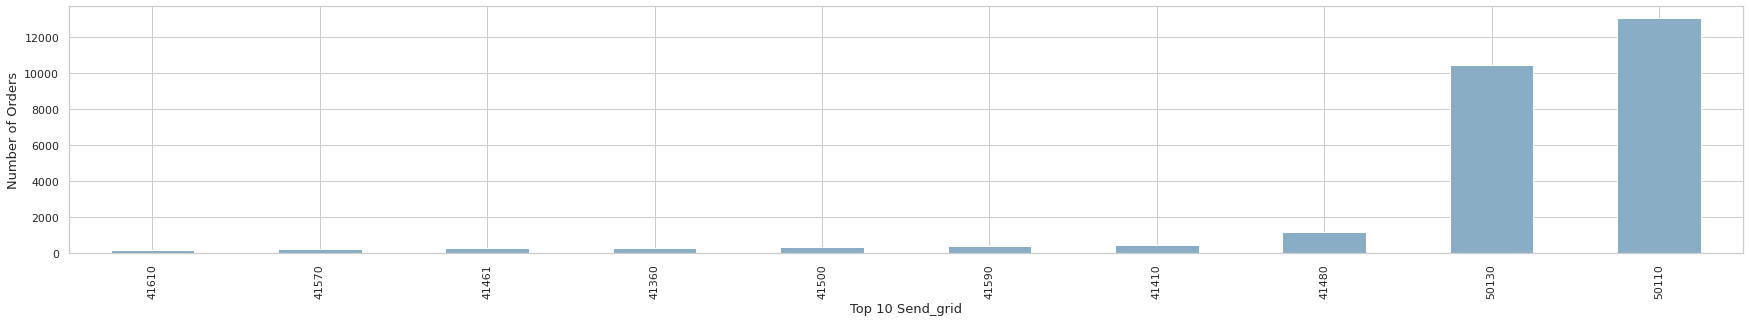

In [14]:
#Top 10 지역 운송이된
plt.subplot(2,1,1)
order_send = train.groupby('Send_grid').count()['counts'].sort_values()
order_send_plot = order_send.tail(10).plot(kind ='bar', figsize=(30,10))
order_send_plot.set_xlabel('Top 10 Send_grid', fontsize=13)
order_send_plot.set_ylabel('Number of Orders', fontsize=13)


Text(0, 0.5, 'Number of Orders')

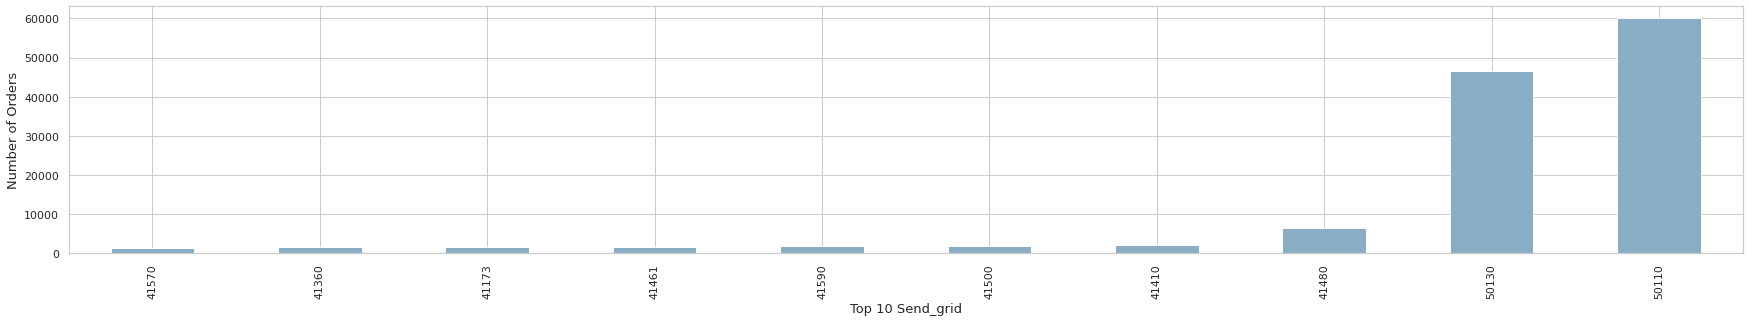

In [15]:
#총 운송량 Top10
plt.subplot(2,1,1)
order_send = train.groupby('Send_grid').sum()['counts'].sort_values()
order_send_plot = order_send.tail(10).plot(kind ='bar', figsize=(30,10))
order_send_plot.set_xlabel('Top 10 Send_grid', fontsize=13)
order_send_plot.set_ylabel('Number of Orders', fontsize=13)

In [16]:
#제주도
df = train[train['Send_grid']==50110]
df

,index,Send,Rec,item,counts,Send_grid,Rec_grid
0,0,5011000595017300,2871000192069300,음반,3,50110,28710
2,2,5011000078068400,1120000007005400,농산물,3,50110,11200
4,4,5011000078068400,2823700010076300,농산물,3,50110,28237
6,6,5011000316024300,4827000369060200,수산,5,50110,48270
9,9,5011000315056100,4127100026035200,농산물,8,50110,41271
...,...,...,...,...,...,...,...
31615,31615,5011000318067400,4611000033092300,냉동/간편조리식품,5,50110,46110
31641,31641,5011000488002400,2635000056100300,생활가전,9,50110,26350
31645,31645,5011000467024400,1120000004089300,생활가전,7,50110,11200
31649,31649,5011000212018400,2817000024075300,낚시,3,50110,28170


In [17]:
catb_count = df.groupby('item').count()['counts'].sort_values(ascending=False)
catb_count_total = df.groupby('item').sum()['counts'].sort_values(ascending=False)

print(catb_count)
print('-'*100)
print(catb_count_total)

item
농산물            9891
수산              735
음료              543
음반              451
기타식품            332
               ... 
모니터               1
모자                1
분유/이유식/아기간식       1
선케어               1
뷰티소품              1
Name: counts, Length: 63, dtype: int64
----------------------------------------------------------------------------------------------------
item
농산물            41205.0
수산              4169.0
음료              3229.0
축산              2630.0
기타식품            1854.0
                ...   
출산/유아동잡화           3.0
침구세트               3.0
모자                 3.0
가방                 3.0
분유/이유식/아기간식        3.0
Name: counts, Length: 63, dtype: float64


In [18]:
#서귀포시
#음식 위주로 보낸다(아마도 특산품)
df1 = train[train['Send_grid']==50130]
df1

,index,Send,Rec,item,counts,Send_grid,Rec_grid
5,5,5013000778073200,4159000114016400,농산물,6,50130,41590
7,7,5013000740006400,4111700017039400,농산물,3,50130,41117
11,11,5013000731055200,4111300020084100,농산물,3,50130,41113
13,13,5013000823047200,1156000002086300,농산물,5,50130,11560
18,18,5013000828084200,2818500009055200,농산물,4,50130,28185
...,...,...,...,...,...,...,...
31585,31585,5013000821028200,4413300199051100,농산물,3,50130,44133
31587,31587,5013000273028100,4812100195086400,농산물,7,50130,48121
31589,31589,5013000813083100,4128100112063400,기타패션의류,3,50130,41281
31609,31609,5013000056011100,4113300010056100,기타식품,7,50130,41133


In [19]:
catb_count = df1.groupby('item').count()['counts'].sort_values(ascending=False)
catb_count_total = df1.groupby('item').sum()['counts'].sort_values(ascending=False)

print(catb_count)
print('-'*100)
print(catb_count_total)

item
농산물          10081
기타식품            82
과자              72
음료              71
가공식품            19
기타패션의류          15
건강식품            13
수산              13
축산              10
취미용품             9
커튼/블라인드          8
문화컨텐츠            5
양말/스타킹           4
잠옷               3
상의               3
하의               3
냉동/간편조리식품        3
신발               2
생활용품             2
홈데코              2
스킨케어             1
아우터              1
수납가구             1
원피스/점프슈트         1
문구/사무용품          1
다이어트식품           1
주방용품             1
낚시               1
김치               1
기타디지털/가전         1
기저귀/물티슈          1
Name: counts, dtype: int64
----------------------------------------------------------------------------------------------------
item
농산물          44669.0
음료             404.0
기타식품           390.0
과자             316.0
축산             170.0
기타패션의류         117.0
가공식품           106.0
건강식품            69.0
수산              66.0
취미용품            35.0
커튼/블라인드         26.0
양말/스타킹          16.0
문화컨텐츠           16.0


In [20]:
#경기도 파주시
df2 = train[train['Send_grid']==41480]
df2

,index,Send,Rec,item,counts,Send_grid,Rec_grid
1,1,4148000690043300,5011000264024400,문화컨텐츠,3,41480,50110
82,82,4148000427007400,5011000429017300,출산/유아동의류,4,41480,50110
103,103,4148000690015300,5011000314090100,문화컨텐츠,4,41480,50110
109,109,4148000690015300,5011000373038200,문화컨텐츠,5,41480,50110
191,191,4148000690015300,5011000319033200,문화컨텐츠,31,41480,50110
...,...,...,...,...,...,...,...
31628,31628,4148000690015300,5011000319089200,문화컨텐츠,3,41480,50110
31631,31631,4148000690015300,5011000212057100,문화컨텐츠,3,41480,50110
31635,31635,4148000690015300,5011000368028200,문화컨텐츠,7,41480,50110
31659,31659,4148000687085300,5011000544072300,음향가전,3,41480,50110


In [21]:
catb_count = df2.groupby('item').count()['counts'].sort_values(ascending=False)
catb_count_total = df2.groupby('item').sum()['counts'].sort_values(ascending=False)

print(catb_count)
print('-'*100)
print(catb_count_total)

item
문화컨텐츠        855
음반           122
가공식품          41
반려동물          22
음향가전          20
건강식품          13
생활용품          10
완구/매트          9
출산/유아동의류       7
취미용품           6
아우터            6
문구/사무용품        6
인테리어소품         6
수납가구           5
농산물            5
주방용품           5
기타디지털/가전       4
과자             4
자동차용품          4
음료             3
서재/사무용가구       3
축산             3
상의             2
기타식품           2
세탁용품           2
침구단품           2
기저귀/물티슈        2
기타패션의류         2
기타화장품/미용       2
침실가구           2
이미용가전          2
주얼리            1
주방가전           1
하의             1
헤어스타일링         1
헤어케어           1
주방가구           1
침구세트           1
DIY자재/용품       1
의료용품           1
아웃도어가구         1
스킨케어           1
수산             1
수납/정리용품        1
모자             1
다이어트식품         1
네일케어           1
냉동/간편조리식품      1
김치             1
계절가전           1
건강용품           1
가방             1
홈데코            1
Name: counts, dtype: int64
-------------------------------------------------------------------

In [22]:
#경기도 군포시
df3 = train[train['Send_grid']==41410]
df3

,index,Send,Rec,item,counts,Send_grid,Rec_grid
69,69,4141000031030100,5011000370022100,건강용품,11,41410,50110
93,93,4141000031030100,5011000594035200,스킨케어,3,41410,50110
117,117,4141000031030100,5011000316031300,하의,3,41410,50110
131,131,4141000031030100,5011000314070200,다이어트식품,4,41410,50110
142,142,4141000031009400,5011000174063300,가공식품,4,41410,50110
...,...,...,...,...,...,...,...
31527,31527,4141000031030100,5011000215089300,과자,3,41410,50110
31594,31594,4141000031030100,5011000169084300,스킨케어,3,41410,50110
31610,31610,4141000031030100,5011000314078200,스킨케어,3,41410,50110
31653,31653,4141000031030100,5011000768084400,선글라스/안경테,3,41410,50110


In [23]:
catb_count = df3.groupby('item').count()['counts'].sort_values(ascending=False)
catb_count_total = df3.groupby('item').sum()['counts'].sort_values(ascending=False)

print(catb_count)
print('-'*100)
print(catb_count_total)

item
스킨케어             67
가공식품             61
건강용품             48
상의               44
건강식품             43
아우터              37
주방용품             24
기저귀/물티슈          21
베이스메이크업          16
생활용품             13
헤어케어             11
다이어트식품            8
패션소품              7
음료                6
언더웨어              5
색조메이크업            5
수산                4
DIY자재/용품          4
반려동물              4
냉동/간편조리식품         4
하의                4
과자                4
이미용가전             3
주방가전              2
농산물               2
기능성               2
위생/건강용품           2
음향가전              2
클렌징               1
침구세트              1
태블릿PC/노트북액세서리     1
축산                1
헤어스타일링            1
헤어액세서리            1
선글라스/안경테          1
재활운동용품            1
의료용품              1
원피스/점프슈트          1
생활가전              1
바디케어              1
기타식품              1
기타스포츠/레저          1
기타디지털/가전          1
공구                1
골프                1
가방                1
홈데코               1
Name: counts, dtype: int64
----------------------------

**제주에서 많은 양을 보낸다**

**경기도 김포시와 군포시**

###  Rec_grid



Text(0, 0.5, 'Number of Recived Items')

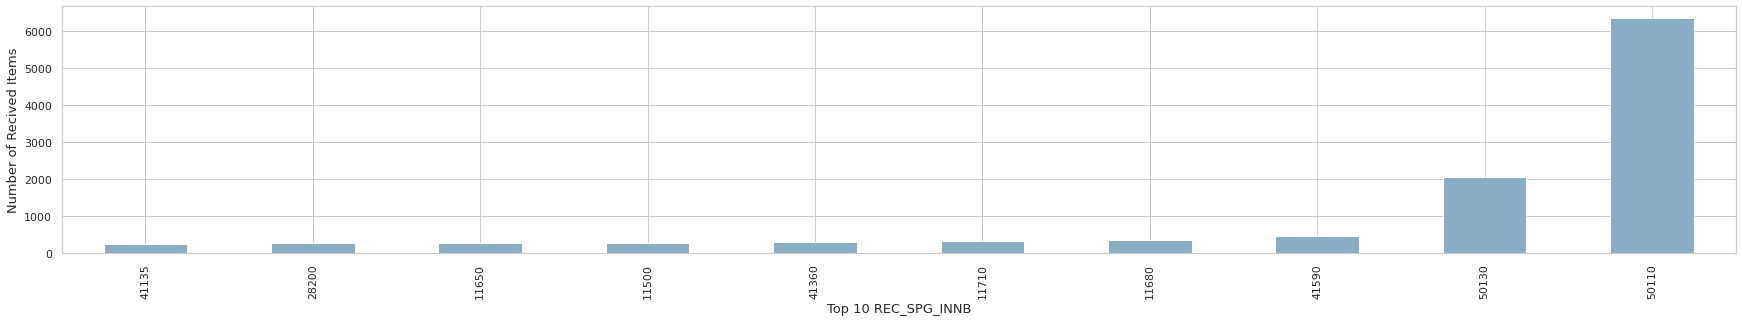

In [24]:
#Top 10 받아지는 지역
plt.subplot(2, 1, 1)
order_recv = train.groupby('Rec_grid').count()['counts'].sort_values()
order_recv_plot = order_recv.tail(10).plot(kind='bar', figsize=(30, 10))
order_recv_plot.set_xlabel('Top 10 REC_SPG_INNB', fontsize=13)
order_recv_plot.set_ylabel('Number of Recived Items', fontsize=13)



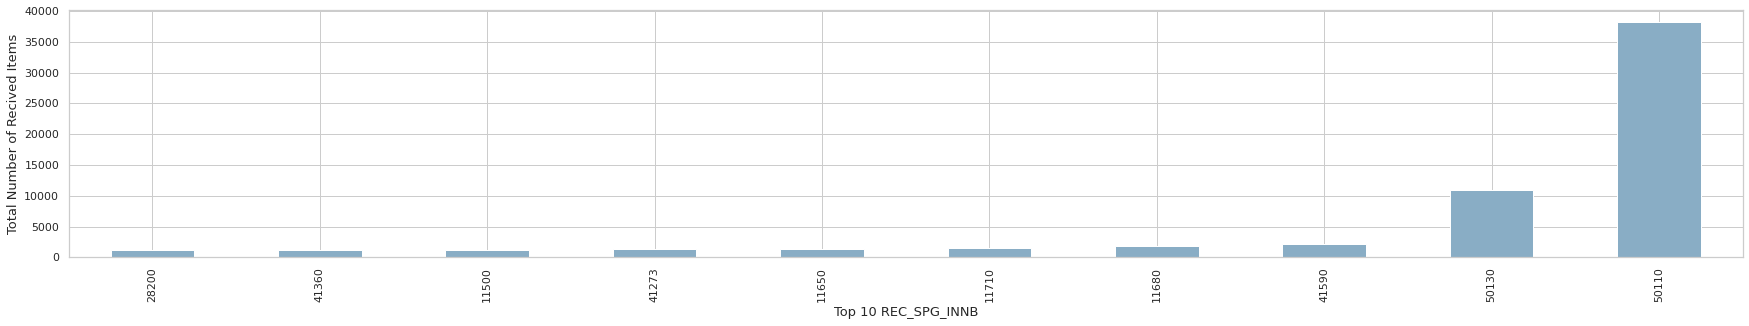

In [25]:
#총 합: 받아지는 지역
plt.subplot(2, 1, 1)
order_recv_total = train.groupby('Rec_grid').sum()['counts'].sort_values()
order_recv_total_plot = order_recv_total.tail(10).plot(kind='bar', figsize=(30, 10))
order_recv_total_plot.set_xlabel('Top 10 REC_SPG_INNB', fontsize=13)
order_recv_total_plot.set_ylabel('Total Number of Recived Items', fontsize=13)

plt.show()

In [26]:
#제주도
df = train[train['Rec_grid']==50110]
df

,index,Send,Rec,item,counts,Send_grid,Rec_grid
1,1,4148000690043300,5011000264024400,문화컨텐츠,3,41480,50110
3,3,4127100048006400,5011000587019400,기타식품,7,41271,50110
12,12,4146300018047300,5011000263069100,신발,3,41463,50110
16,16,4725000538021400,5011000596012200,기타식품,4,47250,50110
38,38,4682000971004300,5011000533051300,스킨케어,3,46820,50110
...,...,...,...,...,...,...,...
31679,31679,4471000290087200,5011000213073200,스포츠잡화,3,44710,50110
31680,31680,1129000014045300,5011000319087100,스마트디바이스,4,11290,50110
31681,31681,1129000014045300,5011000263065200,스마트디바이스,6,11290,50110
31682,31682,4127300065073100,5011000264061200,지갑,7,41273,50110


In [27]:
catb_count = df.groupby('item').count()['counts'].sort_values(ascending=False)
catb_count_total = df.groupby('item').sum()['counts'].sort_values(ascending=False)

print(catb_count)
print('-'*100)
print(catb_count_total)

item
문화컨텐츠            806
가공식품             491
건강식품             397
음료               319
농산물              287
                ... 
선케어                3
아웃도어가구             3
선글라스/안경테           3
태블릿PC/노트북액세서리      3
기타출산/육아            1
Name: counts, Length: 100, dtype: int64
----------------------------------------------------------------------------------------------------
item
문화컨텐츠      3981
가공식품       3404
건강식품       2341
기타패션의류     2160
음료         1662
           ... 
세탁용품         13
아웃도어가구       12
유아가구         10
스포츠잡화         9
기타출산/육아       3
Name: counts, Length: 100, dtype: int64


In [28]:
#서귀포시
df1 = train[train['Rec_grid']==50130]
df1

,index,Send,Rec,item,counts,Send_grid,Rec_grid
8,8,4136000209094100,5013000823053400,아우터,3,41360,50130
17,17,4150000241045200,5013000127047200,건강식품,3,41500,50130
58,58,4682000830009400,5013000862058100,농산물,3,46820,50130
74,74,4377000254047200,5013000396069300,기타스포츠/레저,5,43770,50130
99,99,1150000030012200,5013000785043300,농산물,7,11500,50130
...,...,...,...,...,...,...,...
31652,31652,4711100112075100,5013000685026300,낚시,3,47111,50130
31654,31654,4136000168086400,5013000930025400,헬스,3,41360,50130
31664,31664,4373000420002200,5013000893084400,문구/사무용품,3,43730,50130
31668,31668,4137000004003200,5013000866043200,기능성,5,41370,50130


In [29]:
catb_count = df1.groupby('item').count()['counts'].sort_values(ascending=False)
catb_count_total = df1.groupby('item').sum()['counts'].sort_values(ascending=False)

print(catb_count)
print('-'*100)
print(catb_count_total)

item
문화컨텐츠            244
가공식품             165
농산물              127
건강식품             115
음료               101
                ... 
태블릿PC/노트북액세서리      1
유아가구               1
헤어스타일링             1
헤어액세서리             1
생활가전               1
Name: counts, Length: 88, dtype: int64
----------------------------------------------------------------------------------------------------
item
문화컨텐츠       1224
가공식품        1106
농산물          689
음료           595
주방용품         559
            ... 
모니터            3
출산/유아동잡화       3
헤어스타일링         3
생활가전           3
유아가구           3
Name: counts, Length: 88, dtype: int64


In [30]:
df2 = train[train['Rec_grid']==41590]
df2

,index,Send,Rec,item,counts,Send_grid,Rec_grid
5,5,5013000778073200,4159000114016400,농산물,6,50130,41590
50,50,5011000228004400,4159000599080400,건강식품,3,50110,41590
115,115,5013000824069200,4159000606053100,농산물,3,50130,41590
133,133,5013000839009300,4159000342006400,농산물,3,50130,41590
177,177,5011000078068400,4159000342015400,농산물,3,50110,41590
...,...,...,...,...,...,...,...
31263,31263,5013000910034400,4159000602039300,농산물,3,50130,41590
31403,31403,5013000610049100,4159000247012100,농산물,4,50130,41590
31411,31411,5013000821028200,4159000498085300,농산물,3,50130,41590
31509,31509,5013000821028200,4159000356072300,농산물,6,50130,41590


In [31]:
catb_count = df2.groupby('item').count()['counts'].sort_values(ascending=False)
catb_count_total = df2.groupby('item').sum()['counts'].sort_values(ascending=False)

print(catb_count)
print('-'*100)
print(catb_count_total)

item
농산물         406
수산           16
음료           15
음반            6
축산            4
가공식품          3
기타식품          3
건강식품          2
기능성           1
기타디지털/가전      1
기타패션의류        1
문화컨텐츠         1
생활용품          1
주방용품          1
Name: counts, dtype: int64
----------------------------------------------------------------------------------------------------
item
농산물         1862
수산           110
음료            92
기타패션의류        23
건강식품          19
음반            18
기타식품          13
축산            13
가공식품          12
문화컨텐츠          8
주방용품           6
생활용품           5
기타디지털/가전       4
기능성            3
Name: counts, dtype: int64


In [32]:
df3 = train[train['Rec_grid']==11680]
df3

,index,Send,Rec,item,counts,Send_grid,Rec_grid
86,86,5011000436041400,1168000025047300,농산물,3,50110,11680
92,92,5013000821028200,1168000013007400,농산물,5,50130,11680
138,138,5013000777063100,1168000008034200,농산물,5,50130,11680
186,186,5011000595017300,1168000013070100,음반,4,50110,11680
198,198,5013000692034400,1168000013095400,농산물,3,50130,11680
...,...,...,...,...,...,...,...
31189,31189,5013000861050100,1168000015091400,농산물,10,50130,11680
31258,31258,5013000610049100,1168000021076100,농산물,3,50130,11680
31342,31342,5011000375010100,1168000015094100,음료,4,50110,11680
31432,31432,5013000610049100,1168000025086100,농산물,3,50130,11680


In [33]:
catb_count = df3.groupby('item').count()['counts'].sort_values(ascending=False)
catb_count_total = df3.groupby('item').sum()['counts'].sort_values(ascending=False)

print(catb_count)
print('-'*100)
print(catb_count_total)

item
농산물          299
음반            18
수산            15
축산            10
음료             7
가공식품           5
기타식품           5
과자             4
건강식품           2
기타패션의류         1
냉동/간편조리식품      1
문구/사무용품        1
문화컨텐츠          1
스킨케어           1
이미용가전          1
주방가전           1
Name: counts, dtype: int64
----------------------------------------------------------------------------------------------------
item
농산물          1182
축산            322
음반             84
수산             60
가공식품           46
음료             28
기타식품           19
문화컨텐츠          16
건강식품           14
과자             14
주방가전           11
냉동/간편조리식품       5
기타패션의류          4
문구/사무용품         4
스킨케어            3
이미용가전           3
Name: counts, dtype: int64


### item

In [34]:
catb_count = train.groupby('item').count()['counts'].sort_values(ascending=False)
catb_count_total = train.groupby('item').sum()['counts'].sort_values(ascending=False)

print(catb_count)
print('-'*100)
print(catb_count_total)


item
농산물              20321
문화컨텐츠             1091
음료                1034
수산                 860
가공식품               846
                 ...  
태블릿PC/노트북액세서리        4
기타출산/육아              4
선케어                  4
유아가구                 4
스포츠잡화                4
Name: counts, Length: 100, dtype: int64
----------------------------------------------------------------------------------------------------
item
농산물        87829.0
음료          5890.0
가공식품        5766.0
문화컨텐츠       5429.0
수산          4880.0
            ...   
기타출산/육아       22.0
지갑            22.0
세탁용품          20.0
유아가구          13.0
스포츠잡화         13.0
Name: counts, Length: 100, dtype: float64


### Correlation map before featuring engineering

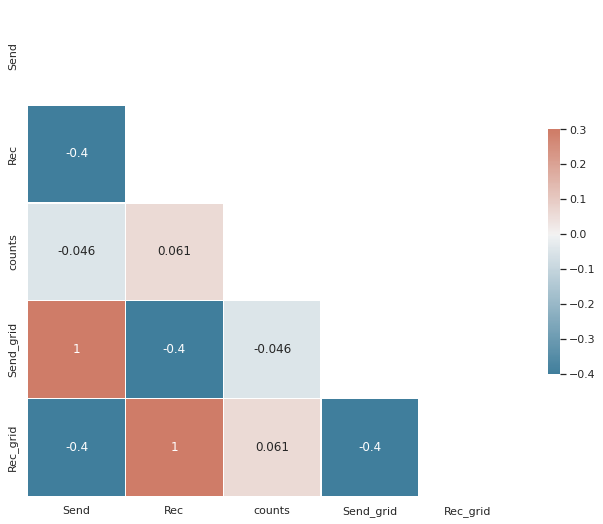

In [35]:
# Compute the correlation matrix
corr = train.drop(['index'], axis=1).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})